## Practico 1

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [151]:
data = pd.read_csv("../datasets/GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv")
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


# Exploratory Data Analysis (EDA)

In [152]:
data.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [153]:
data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [154]:
data["year"] = data.dt.str.split("-").str[0].astype(int)
data["month"] = data.dt.str.split("-").str[1].astype(int)
data["day"] = data.dt.str.split("-").str[2].astype(int)
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month,day
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1,1
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,2,1
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,3,1
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,4,1
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,5,1
...,...,...,...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E,2013,5,1
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E,2013,6,1
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E,2013,7,1
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E,2013,8,1


In [155]:
data.year.min(), data.year.max()

(np.int64(1743), np.int64(2013))

<Axes: ylabel='year'>

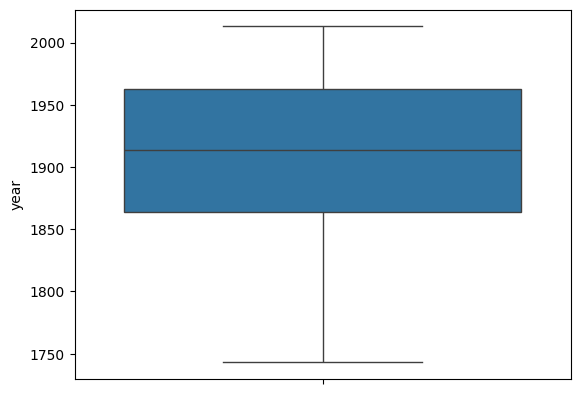

In [156]:
sns.boxplot(data, y="year")

In [157]:
data.City.unique()

array(['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria',
       'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte',
       'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta',
       'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu',
       'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam',
       'Delhi', 'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh',
       'Guangzhou', 'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad',
       'Ibadan', 'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah',
       'Jinan', 'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa',
       'Lagos', 'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles',
       'Luanda', 'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne',
       'Mexico', 'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur',
       'Nairobi', 'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking',
       'Pune', 'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome', 'São Paulo',
       'S

In [158]:
santiago = data[data.City == "Santiago"]
santiago

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month,day
198861,1855-05-01,2.379,1.432,Santiago,Chile,32.95S,69.89W,1855,5,1
198862,1855-06-01,-1.743,2.225,Santiago,Chile,32.95S,69.89W,1855,6,1
198863,1855-07-01,-1.833,1.592,Santiago,Chile,32.95S,69.89W,1855,7,1
198864,1855-08-01,0.072,1.391,Santiago,Chile,32.95S,69.89W,1855,8,1
198865,1855-09-01,1.771,1.326,Santiago,Chile,32.95S,69.89W,1855,9,1
...,...,...,...,...,...,...,...,...,...,...
200757,2013-05-01,3.297,0.365,Santiago,Chile,32.95S,69.89W,2013,5,1
200758,2013-06-01,0.886,0.599,Santiago,Chile,32.95S,69.89W,2013,6,1
200759,2013-07-01,-0.521,0.600,Santiago,Chile,32.95S,69.89W,2013,7,1
200760,2013-08-01,0.839,0.390,Santiago,Chile,32.95S,69.89W,2013,8,1


<Axes: ylabel='year'>

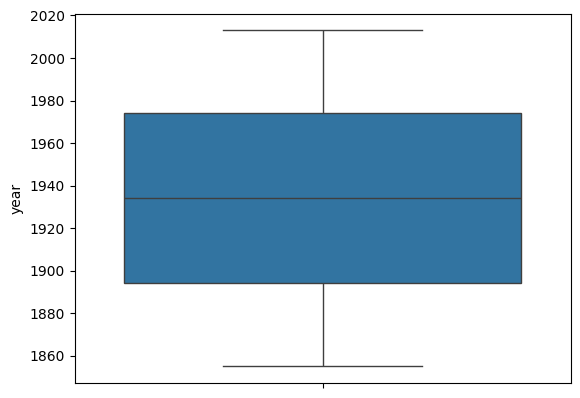

In [159]:
sns.boxplot(santiago, y="year")

<Axes: xlabel='year', ylabel='AverageTemperature'>

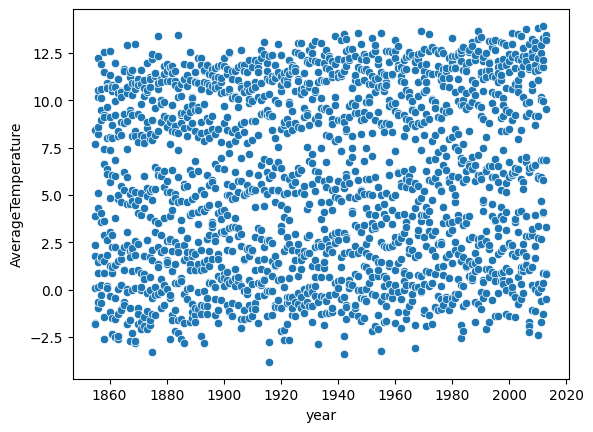

In [160]:
sns.scatterplot(santiago, x="year", y="AverageTemperature")

/tmp/ipykernel_9549/2074813257.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month["year"] = ss.fit_transform(month[["year"]])


<Axes: title={'center': 'Month: 12'}, xlabel='year', ylabel='AverageTemperature'>

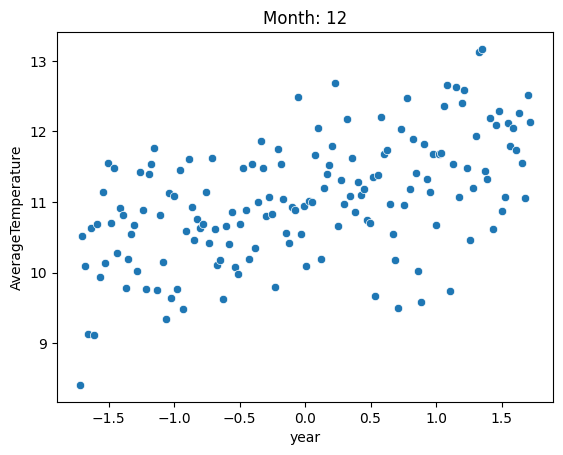

In [161]:
month_index = 12
month = santiago[santiago.month == month_index]
ss = StandardScaler()
month["year"] = ss.fit_transform(month[["year"]])
plt.title(f"Month: {month_index}")
sns.scatterplot(month, x="year", y="AverageTemperature")

In [162]:
month

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month,day
198868,1855-12-01,8.408,2.704,Santiago,Chile,32.95S,69.89W,-1.721123,12,1
198880,1856-12-01,10.524,1.922,Santiago,Chile,32.95S,69.89W,-1.699198,12,1
198892,1857-12-01,10.096,1.360,Santiago,Chile,32.95S,69.89W,-1.677273,12,1
198904,1858-12-01,9.125,1.470,Santiago,Chile,32.95S,69.89W,-1.655348,12,1
198916,1859-12-01,10.627,1.586,Santiago,Chile,32.95S,69.89W,-1.633422,12,1
...,...,...,...,...,...,...,...,...,...,...
200704,2008-12-01,12.267,0.302,Santiago,Chile,32.95S,69.89W,1.633422,12,1
200716,2009-12-01,11.549,0.309,Santiago,Chile,32.95S,69.89W,1.655348,12,1
200728,2010-12-01,11.064,0.430,Santiago,Chile,32.95S,69.89W,1.677273,12,1
200740,2011-12-01,12.513,0.393,Santiago,Chile,32.95S,69.89W,1.699198,12,1


In [163]:
X = month[["year"]].values
y = month[["AverageTemperature"]].values
y.shape, X.shape

((158, 1), (158, 1))

In [164]:
phi = np.append(np.ones(X.shape), X, axis=1)
phi.shape

(158, 2)

In [165]:
phi.T.shape

(2, 158)

In [166]:
pseudo_inverse =np.linalg.inv (phi.T @ phi)@ phi.T

In [167]:
w = pseudo_inverse @y
w

array([[11.03342405],
       [ 0.45907128]])

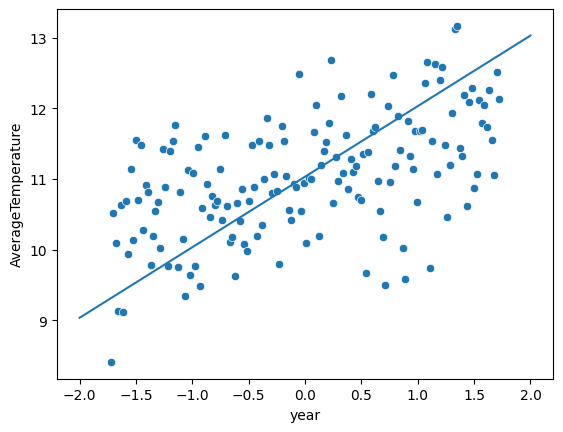

In [168]:
x_line = np.linspace(-2,2).reshape(-1,1)
y_pred = w[0][0] + [1][0]*x_line
sns.scatterplot(month, x="year", y="AverageTemperature")
plt.plot(x_line, y_pred)

In [169]:
from sklearn.linear_model import LinearRegression

In [170]:
X.shape, y.shape

((158, 1), (158, 1))

In [171]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [172]:
"MSE:", lr.score(X, y)

('MSE:', 0.28917985896497866)

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((118, 1), (40, 1), (118, 1), (40, 1))

In [175]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [176]:
lr.score(X_test, y_test)

0.2990283027543963

In [177]:
y_pred = lr.predict(x_line)

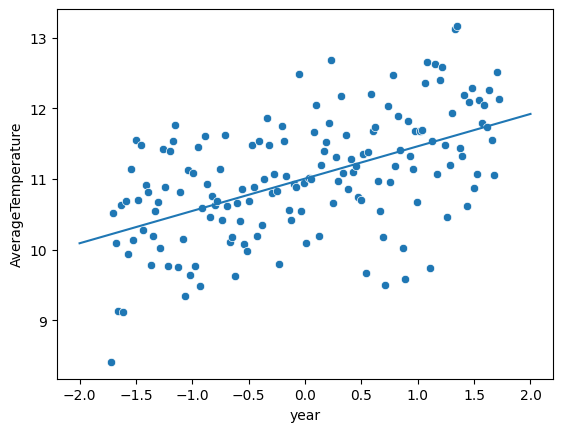

In [178]:
sns.scatterplot(month, x="year", y="AverageTemperature")
plt.plot(x_line, y_pred)

In [179]:
from sklearn.linear_model import Ridge

0.2989524543096773


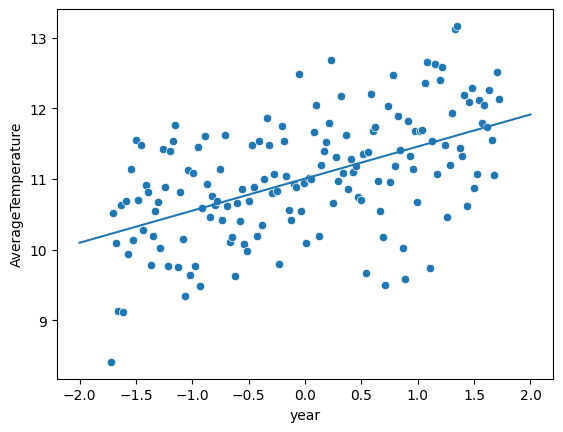

In [180]:
lr = Ridge()
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
y_pred = lr.predict(x_line)
sns.scatterplot(month, x="year", y="AverageTemperature")
plt.plot(x_line, y_pred)